# Tel Aviv Pressure Prediction : Sachin Kumar Singh

In [1]:
import pandas as pd
import io
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Indexing the dataset with datetime instead of integers

In [3]:
df = pd.read_csv('C:/Users/Sachin/Desktop/HAMOYE Codes/Big Project/Weather Prediction/Tel_Aviv.csv').rename(columns={'wind speed':'wind_speed'})
# df.set_index('datetime')
df['datetime'] = pd.DatetimeIndex(df['datetime'])

In [7]:
df

,datetime,pressure,humidity,temperature,weather,wind direction,wind_speed
0,2012-10-01 12:00:00,1013.815468,NaN,NaN,sky is not clear,NaN,NaN
1,2012-10-01 13:00:00,1012.000000,63.0,305.470000,sky is clear,0.0,0.0
2,2012-10-01 14:00:00,1012.000000,62.0,304.310000,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,1012.000000,62.0,304.281841,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,1012.000000,62.0,304.238015,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,1013.815468,NaN,NaN,sky is not clear,60.0,NaN
45249,2017-11-29 21:00:00,1013.815468,NaN,NaN,sky is not clear,40.0,NaN
45250,2017-11-29 22:00:00,1013.815468,NaN,NaN,sky is not clear,70.0,NaN
45251,2017-11-29 23:00:00,1013.815468,NaN,NaN,sky is not clear,60.0,NaN


# Filling missing values with mean

In [8]:
df['pressure'].fillna(df['pressure'].mean(), inplace = True)
temp_df = df[["pressure"]].set_index(df['datetime'])
display(temp_df)

,pressure
datetime,
2012-10-01 12:00:00,1013.815468
2012-10-01 13:00:00,1012.000000
2012-10-01 14:00:00,1012.000000
2012-10-01 15:00:00,1012.000000
2012-10-01 16:00:00,1012.000000
...,...
2017-11-29 20:00:00,1013.815468
2017-11-29 21:00:00,1013.815468
2017-11-29 22:00:00,1013.815468


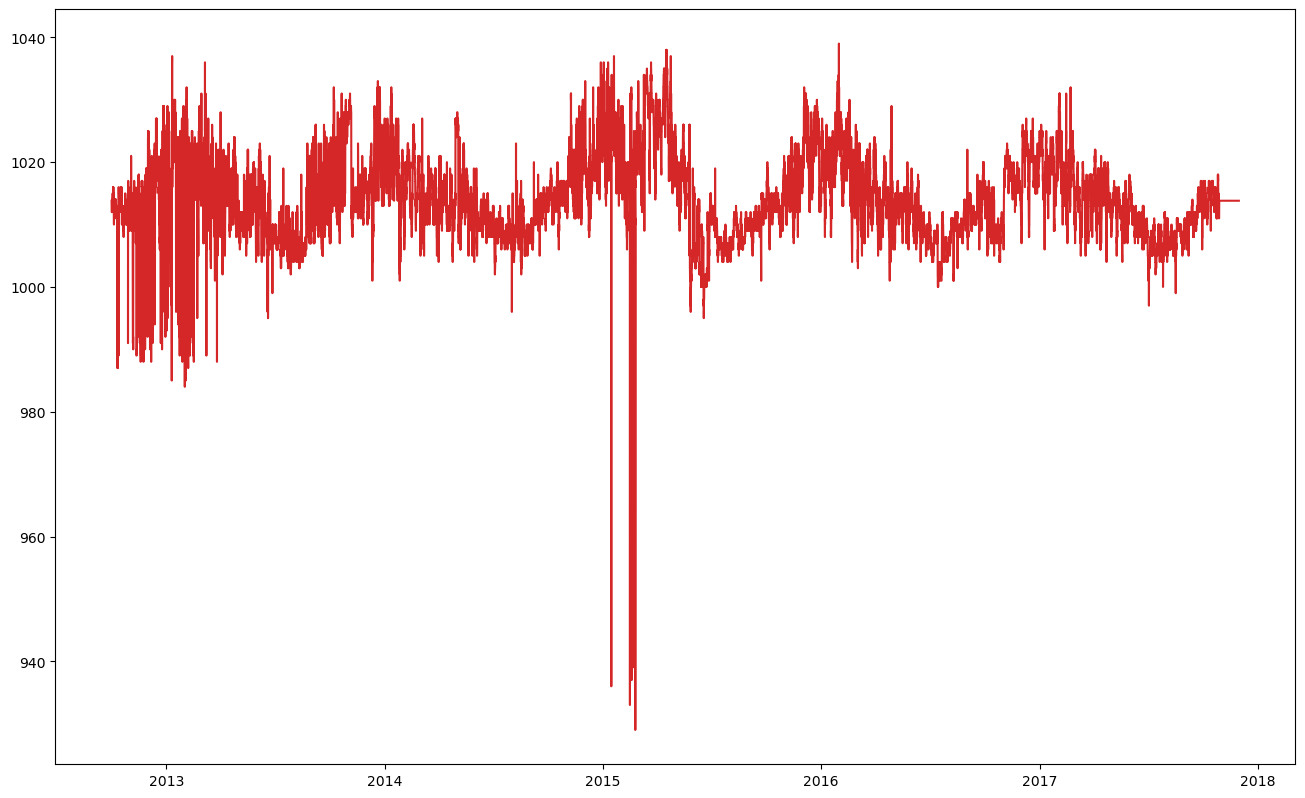

In [9]:
plt.figure(figsize=(16,10),dpi=100)
plt.plot(temp_df.index, temp_df.pressure, color = 'tab:red')
plt.show()

# Resampling hourly data into daily data

In [10]:
df1 = temp_df.resample('D').mean()

#Dropping last few rows because they were originally null rows that were only disrupting model accuracy
df1=df1.drop(df1.loc['2017-10-28':].index)

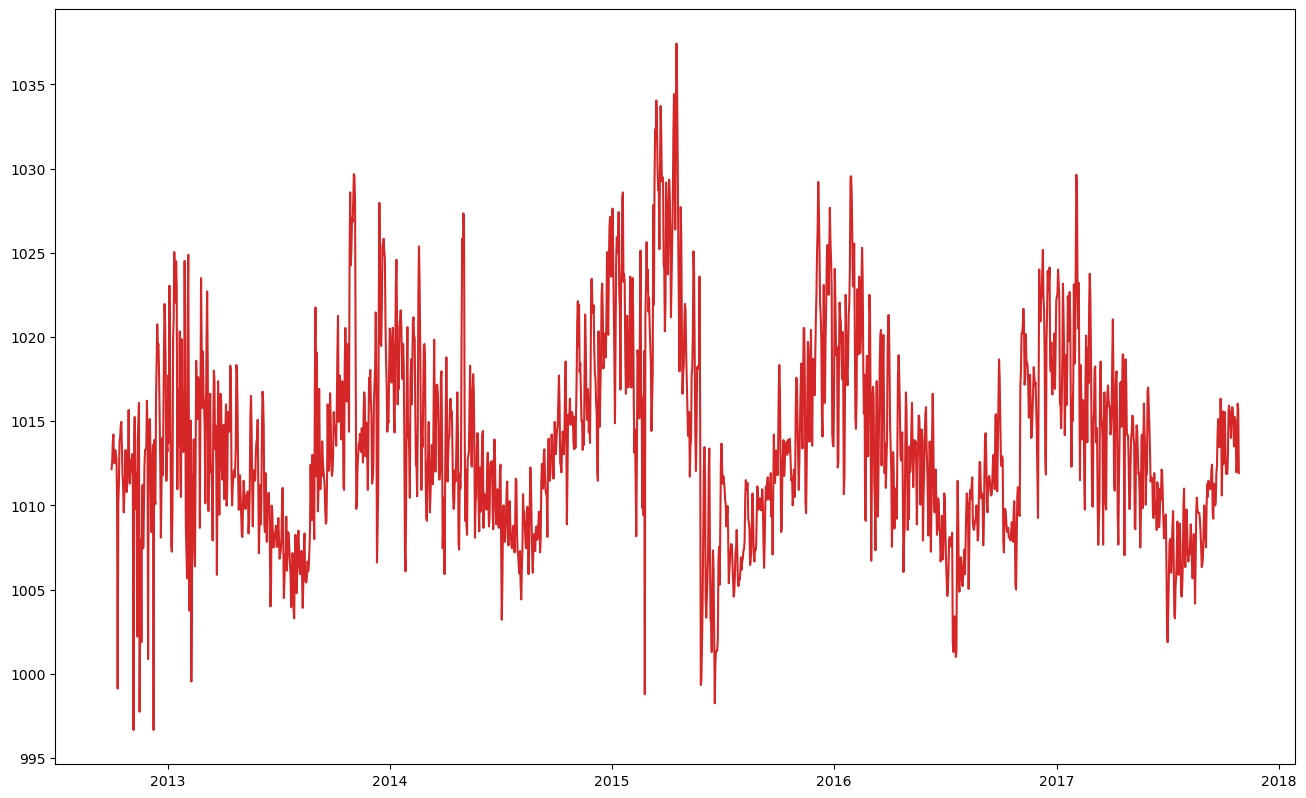

In [12]:
plt.figure(figsize=(16,10),dpi=100)
plt.plot(df1.index, df1.pressure, color = 'tab:red')
plt.show()

# Smoothing the dataset to better picture trend and seasonality

<AxesSubplot:xlabel='datetime'>

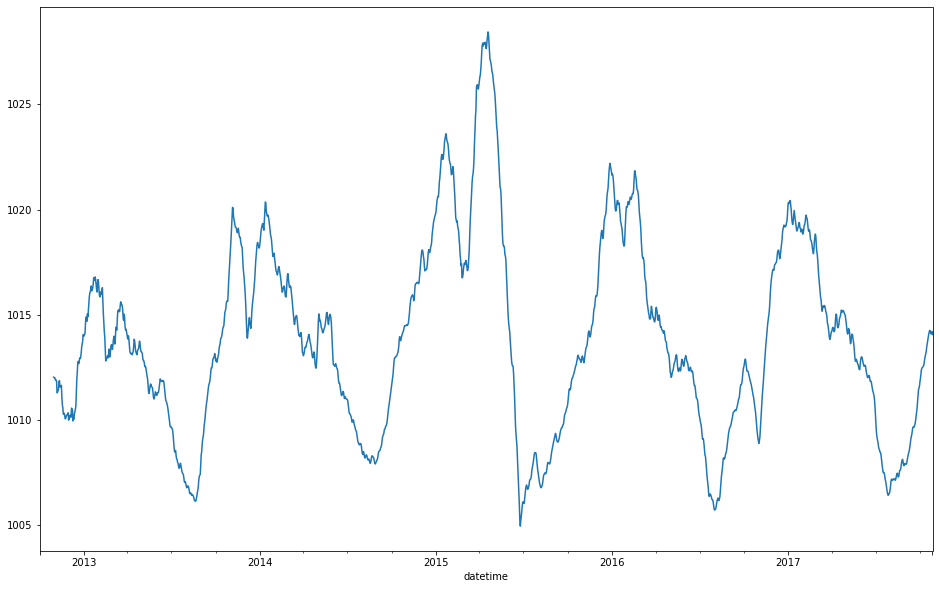

In [13]:
df1_ma = df1.pressure.rolling(window=30).mean()
df1_ma.plot(figsize=(16,10))

# One step prediction modelling

# Assumption: value of nth row depends only on (n-1)th row

In [14]:
predicted_df = df1["pressure"].to_frame().shift(1).rename(columns = {"pressure":"predicted pressure"})
actual_df = df1["pressure"].to_frame().rename(columns = {"pressure":"actual pressure"})
one_step_df = pd.concat([actual_df, predicted_df], axis = 1)
one_step_df = one_step_df[1:]
display(one_step_df)

,actual pressure,predicted pressure
datetime,,
2012-10-02,1012.583333,1012.151289
2012-10-03,1013.750000,1012.583333
2012-10-04,1014.208333,1013.750000
2012-10-05,1012.541667,1014.208333
2012-10-06,1012.500000,1012.541667
...,...,...
2017-10-23,1011.958333,1013.708333
2017-10-24,1012.500000,1011.958333
2017-10-25,1016.041667,1012.500000


In [15]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
rmse = sqrt(MSE(one_step_df["actual pressure"], one_step_df["predicted pressure"]))
print(rmse)

3.192656676637933


# One-step prediction for the hourly version of the dataset

In [16]:
predicted_df2 = temp_df["pressure"].to_frame().shift(1).rename(columns = {"pressure":"predicted pressure"})
actual_df2 = temp_df["pressure"].to_frame().rename(columns = {"pressure":"actual pressure"})
one_step_df2 = pd.concat([actual_df2, predicted_df2], axis = 1)
one_step_df2 = one_step_df2[1:]
display(one_step_df2)

,actual pressure,predicted pressure
datetime,,
2012-10-01 13:00:00,1012.000000,1013.815468
2012-10-01 14:00:00,1012.000000,1012.000000
2012-10-01 15:00:00,1012.000000,1012.000000
2012-10-01 16:00:00,1012.000000,1012.000000
2012-10-01 17:00:00,1012.000000,1012.000000
...,...,...
2017-11-29 20:00:00,1013.815468,1013.815468
2017-11-29 21:00:00,1013.815468,1013.815468
2017-11-29 22:00:00,1013.815468,1013.815468


In [17]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
rmse = sqrt(MSE(one_step_df2["actual pressure"], one_step_df2["predicted pressure"]))
print(rmse)

2.3868847985985227


# Decomposing time series data

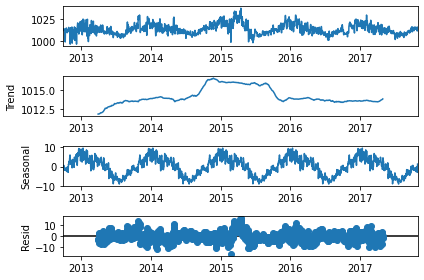

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df1, model="pseudo", freq=365)
decompose_data.plot();

# **SARIMA Modelling**

                                     SARIMAX Results                                      
Dep. Variable:                           pressure   No. Observations:                 1853
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -4587.398
Date:                            Fri, 18 Feb 2022   AIC                           9184.795
Time:                                    15:55:19   BIC                           9212.342
Sample:                                10-01-2012   HQIC                          9194.957
                                     - 10-27-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2478      0.013    -19.798      0.000      -0.272      -0.223
ma.L2         -0.4240      0.014   

C:\Users\Sachin\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


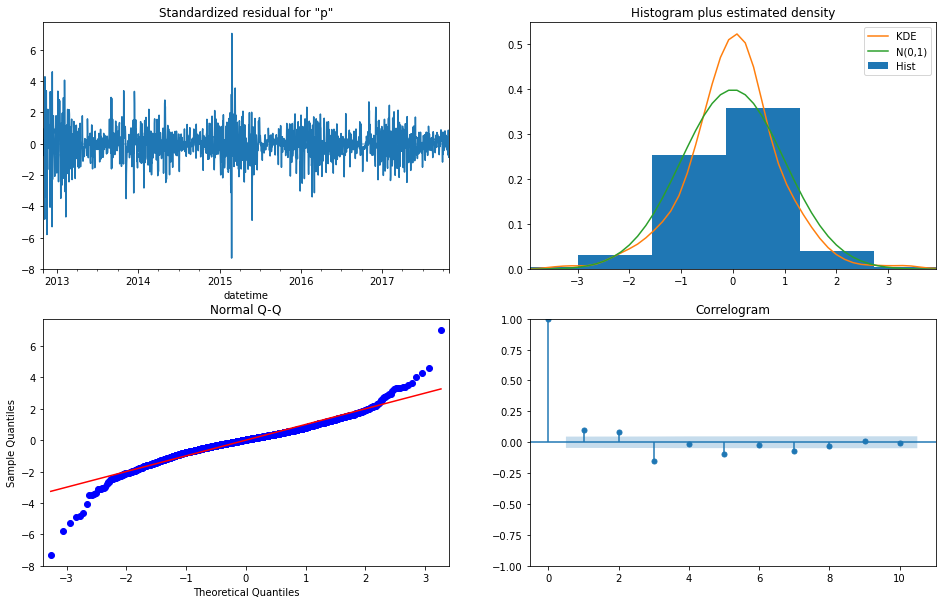

In [21]:
# Build SARIMAX model w/optimal parameters
import itertools
import statsmodels.api as sm
sarimax = sm.tsa.statespace.SARIMAX(df1['pressure'], 
                                    order=(0,1,2), 
                                    seasonal_order=(0,0,2,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='D')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

# Prediction (within the dataset)

In [22]:
pred = output.get_prediction(start=pd.to_datetime('2014-07-07'), dynamic=False)
pred_ci = pred.conf_int()
print(pred.predicted_mean)

datetime
2014-07-07    1008.920409
2014-07-08    1009.237234
2014-07-09    1007.851677
2014-07-10    1008.352255
2014-07-11    1008.259761
                 ...     
2017-10-23    1014.116794
2017-10-24    1012.847163
2017-10-25    1013.485616
2017-10-26    1015.610565
2017-10-27    1014.506036
Freq: D, Name: predicted_mean, Length: 1209, dtype: float64


# Model is working accurately within the dataset

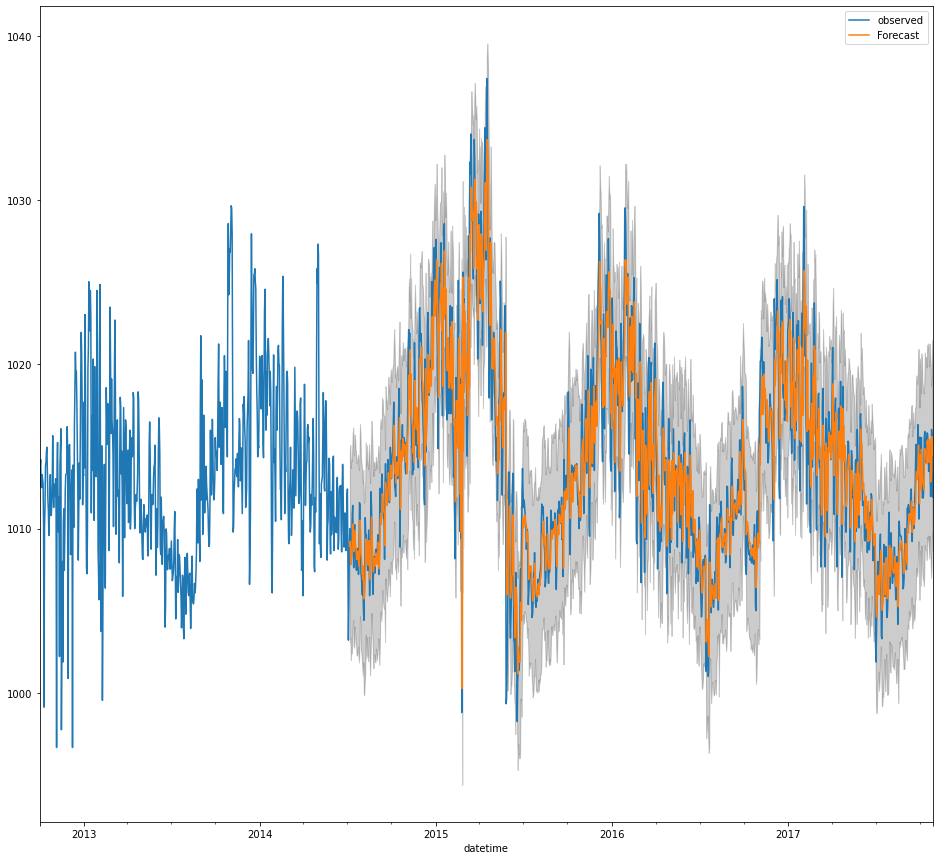

In [23]:
ax = one_step_df['actual pressure'].plot(label='observed', figsize=(16,15))
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

# Prediction (within and beyond the dataset)

2015-07-07    1010.181432
2015-07-08    1010.228553
2015-07-09    1009.197268
2015-07-10    1009.820976
2015-07-11    1009.774886
                 ...     
2018-07-03    1013.689340
2018-07-04    1013.689340
2018-07-05    1013.689340
2018-07-06    1013.689340
2018-07-07    1013.689340
Freq: D, Name: predicted_mean, Length: 1097, dtype: float64


<AxesSubplot:>

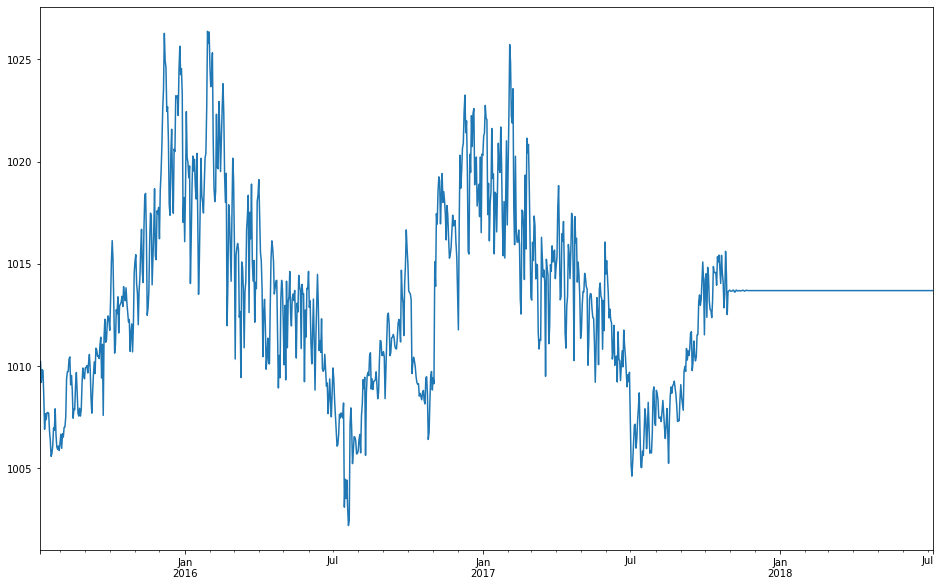

In [24]:
pred1 = output.get_prediction(start=pd.to_datetime('2015-07-07'), end=pd.to_datetime('2018-07-07'), dynamic=False)
pred1_ci = pred.conf_int()
print(pred1.predicted_mean)
pred1.predicted_mean.plot(figsize=(16,10))

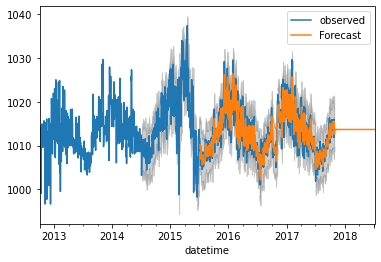

In [25]:
ax = one_step_df['actual pressure'].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred1_ci.index, pred1_ci.iloc[:, 0], pred1_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()